
Images shape: (11151, 32, 32, 3)
Labels shape: (11151, 2)



Epoch 1/50


279/279 [==============================] - 8s 23ms/step - loss: 1.5797 - accuracy: 0.5836 - val_loss: 0.8025 - val_accuracy: 0.4473
Epoch 2/50
279/279 [==============================] - 6s 23ms/step - loss: 0.6407 - accuracy: 0.6288 - val_loss: 0.7745 - val_accuracy: 0.5150
Epoch 3/50
279/279 [==============================] - 3s 11ms/step - loss: 0.6104 - accuracy: 0.6504 - val_loss: 0.4275 - val_accuracy: 0.8610
Epoch 4/50
279/279 [==============================] - 3s 11ms/step - loss: 0.5865 - accuracy: 0.6756 - val_loss: 0.8004 - val_accuracy: 0.4993
Epoch 5/50
279/279 [==============================] - 7s 24ms/step - loss: 0.5644 - accuracy: 0.7029 - val_loss: 0.5152 - val_accuracy: 0.7759
Epoch 6/50
279/279 [==============================] - 6s 22ms/step - loss: 0.5549 - accuracy: 0.7021 - val_loss: 0.7543 - val_accuracy: 0.5760
Epoch 7/50
279/279 [==============================] - 4s 14ms/step - loss: 0.5

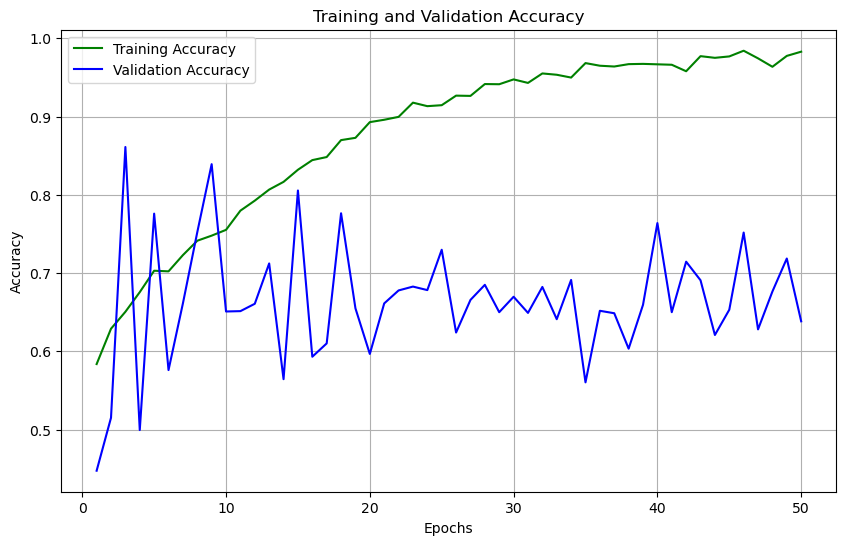

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

angry_dir = "angry/"  
neutral_dir = "neutral/" 

images = []
labels = []

for filename in os.listdir(angry_dir):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(angry_dir, filename))
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append([1, 0])  

for filename in os.listdir(neutral_dir):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(neutral_dir, filename))
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append([0, 1])  

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

split_ratio = 0.8  
split_index = int(len(images) * split_ratio)

train_images, val_images = images[:split_index], images[split_index:]
train_labels, val_labels = labels[:split_index], labels[split_index:]

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels))

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
